In [2]:
import sys
import time
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import eBeam_v02 as eBeam2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
c = SI.lightSpeed;

In [3]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2); 
en = 5.3e-6; 
beta_s = np.linspace(.05, 1.5, 100);
sigma_z = 5e-6; 
sigma_t = sigma_z / (beta * c); 
Q = 1.5e-9;

beamParams = {
              'gamma'   : gamma,  
              'sigma_z' : sigma_z, 
              'sigma_t' : sigma_t, 
              'beta'    : beta,
              'charge'  : Q, 
              'emitt'   : en, 
              'beta_s'  : beta_s
             }

eBeam2.get_sigma_r(beamParams)
pPk = eBeam2.peak_charge_dens(beamParams)
r, xi, npoints = eBeam2.get_pos(beamParams, nxi = 2, npoints = 1000);
pos = {'r' : r, 'xi' : xi, 'npoints' : npoints}


In [4]:
Er, rPeak, EPeak = eBeam2.rad_E_field(pos, beamParams)

Beta = 0.05m


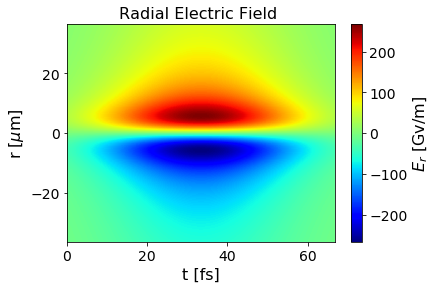

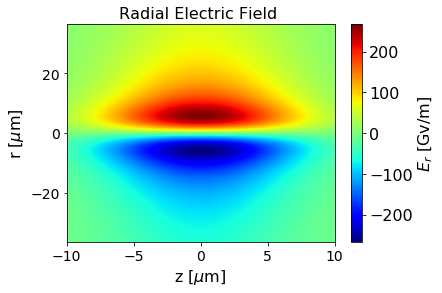

In [4]:
eBeam2.plot_field(Er, pos, beamParams, '$E_r$ [Gv/m]', beta_s, 0, fs = 16)

In [5]:
W_Ar1 = eBeam2.ionization_rate(Er, beamParams, 'Ar+')
W_Ar2 = eBeam2.ionization_rate(Er, beamParams, 'Ar2+')
W_He1 = eBeam2.ionization_rate(Er, beamParams, 'He+')
W_He2 = eBeam2.ionization_rate(Er, beamParams, 'He2+')

Beta = 0.05m


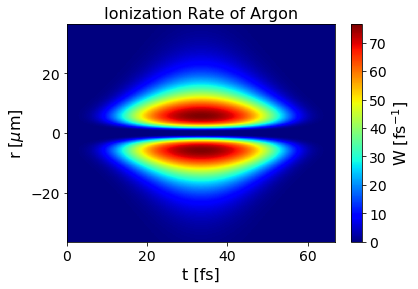

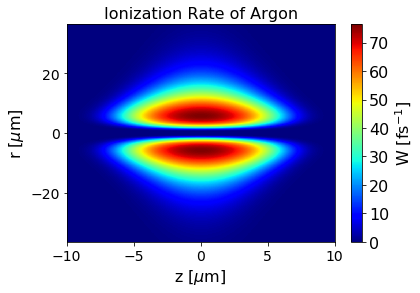

In [7]:
eBeam2.plot_field(W_Ar1, pos, beamParams, 'W [fs$^{-1}$]', beta_s, 0, fs = 16, gas = True, gasName = 'Argon')

In [6]:
ion_frac_Ar1, max_ion_Ar1 = eBeam2.ionization_frac(W_Ar1, pos, beamParams)
ion_frac_Ar2, max_ion_Ar2 = eBeam2.ionization_frac(W_Ar2, pos, beamParams)
ion_frac_He1, max_ion_He1 = eBeam2.ionization_frac(W_He1, pos, beamParams)
ion_frac_He2, max_ion_He2 = eBeam2.ionization_frac(W_He2, pos, beamParams)

In [7]:
max_frac = [max_ion_Ar1, max_ion_Ar2, max_ion_He1, max_ion_He2]
plasmaNames = ['Ar+', 'Ar2+', 'He+', 'He2+']


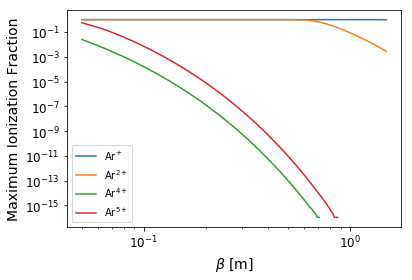

In [10]:
eBeam2.plot_max_frac(max_frac, beamParams, plasmaNames, fs = 14, log = True)